In [1]:
import sklearn.model_selection as sk
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 

In [56]:
#Make regression dataset

#X,y=make_regression(n_samples=5000,n_features=2000,n_informative=2000,noise=50)
X,y=make_friedman1(n_samples=5000, n_features=2000,  noise=50, random_state=None)

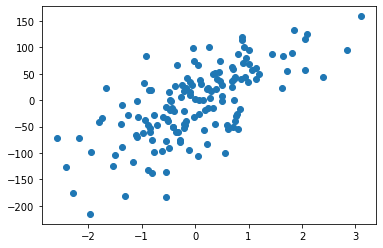

In [36]:
pyplot.scatter(X,y)
pyplot.show()

In [12]:

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [14]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [15]:
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.3, random_state=123)

In [16]:
X_train=np.array(X_train)
Y_train=np.array(y_train)
X_test=np.array(X_test)
Y_test=np.array(y_test)

In [17]:
# Normalization

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [48]:
Y_train=Y_train/100
Y_test=Y_test/100

In [4]:
data_train = tf.cast(X_train,tf.float32)

NameError: name 'X_train' is not defined

In [19]:
labels_train = tf.cast(Y_train, tf.float32)

In [20]:
data_test = tf.cast(X_test, tf.float32)
labels_test = tf.cast(Y_test, tf.float32)

<tf.Tensor: id=3, shape=(3500,), dtype=float32, numpy=
array([-1259.1865 ,  1063.8015 ,  -925.0276 , ...,  1279.0381 ,
         524.08026,  -670.9818 ], dtype=float32)>

In [11]:
np.savetxt("data_train.data", data_train)
np.savetxt("data_test.data", data_test)
np.savetxt("labels_test.data", labels_test)
np.savetxt("labels_train.data", labels_train)
        

In [3]:
        data_train=np.loadtxt("data_train.data")
        labels_train=np.loadtxt("labels_train.data")
        data_test=np.loadtxt("data_test.data")
        labels_test=np.loadtxt("labels_test.data")

In [6]:
x_train=data_train
y_train=labels_train
x_test=data_test
y_test=labels_test


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(5, activation='linear', input_shape=(2,)))
model.add(layers.Dense(5, activation='elu'))
model.add(layers.Dense(5, activation='elu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(x_train,y_train,batch_size=100,epochs=300,verbose=1)
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Train on 10248 samples
Epoch 1/300
10248/10248 [==============================] - 1s 60us/sample - loss: 8.0087 - mean_squared_error: 8.0087
Epoch 2/300
10248/10248 [==============================] - 0s 13us/sample - loss: 5.8479 - mean_squared_error: 5.84

10248/10248 [==============================] - 0s 13us/sample - loss: 1.1961 - mean_squared_error: 1.1961
Epoch 63/300
10248/10248 [==============================] - 0s 14us/sample - loss: 1.2053 - mean_squared_error: 1.2053
Epoch 64/300
10248/10248 [==============================] - 0s 14us/sample - loss: 1.1880 - mean_squared_error: 1.1880
Epoch 65/300
10248/10248 [==============================] - 0s 13us/sample - loss: 1.1967 - mean_squared_error: 1.1967s - loss: 1.1830 - mean_squared_error: 1.
Epoch 66/300
10248/10248 [==============================] - 0s 14us/sample - loss: 1.2273 - mean_squared_error: 1.2273
Epoch 67/300
10248/10248 [==============================] - 0s 14us/sample - loss: 1.1935 - mean_squared_error: 1.1935
Epoch 68/300
10248/10248 [==============================] - 0s 13us/sample - loss: 1.2074 - mean_squared_error: 1.2074
Epoch 69/300
10248/10248 [==============================] - 0s 13us/sample - loss: 1.2344 - mean_squared_error: 1.2344
Epoch 70/300
10248/1

10248/10248 [==============================] - 0s 14us/sample - loss: 0.8585 - mean_squared_error: 0.8585
Epoch 131/300
10248/10248 [==============================] - 0s 15us/sample - loss: 0.8708 - mean_squared_error: 0.8708
Epoch 132/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8179 - mean_squared_error: 0.8179
Epoch 133/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8411 - mean_squared_error: 0.8411
Epoch 134/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.9057 - mean_squared_error: 0.9057
Epoch 135/300
10248/10248 [==============================] - 0s 12us/sample - loss: 0.8372 - mean_squared_error: 0.8372
Epoch 136/300
10248/10248 [==============================] - 0s 12us/sample - loss: 0.8491 - mean_squared_error: 0.8491
Epoch 137/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8479 - mean_squared_error: 0.8479
Epoch 138/300
10248/10248 [===========================

10248/10248 [==============================] - 0s 14us/sample - loss: 0.8324 - mean_squared_error: 0.8324
Epoch 199/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8155 - mean_squared_error: 0.8155
Epoch 200/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8192 - mean_squared_error: 0.8192
Epoch 201/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8929 - mean_squared_error: 0.8929
Epoch 202/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8230 - mean_squared_error: 0.8230
Epoch 203/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8386 - mean_squared_error: 0.8386
Epoch 204/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8322 - mean_squared_error: 0.8322
Epoch 205/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8546 - mean_squared_error: 0.8546
Epoch 206/300
10248/10248 [===========================

10248/10248 [==============================] - 0s 13us/sample - loss: 0.8419 - mean_squared_error: 0.8419
Epoch 267/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8306 - mean_squared_error: 0.8306
Epoch 268/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8300 - mean_squared_error: 0.8300
Epoch 269/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8426 - mean_squared_error: 0.8426
Epoch 270/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8303 - mean_squared_error: 0.8303
Epoch 271/300
10248/10248 [==============================] - 0s 13us/sample - loss: 0.8544 - mean_squared_error: 0.8544
Epoch 272/300
10248/10248 [==============================] - 0s 14us/sample - loss: 0.8215 - mean_squared_error: 0.8215
Epoch 273/300
10248/10248 [==============================] - 0s 16us/sample - loss: 0.8474 - mean_squared_error: 0.8474
Epoch 274/300
10248/10248 [===========================

[0.7646124587090499, 0.76461244]

In [12]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

152/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[0.000e+00, 7.000e+00],
       [1.000e+00, 5.000e+00],
       [2.000e+00, 1.100e+01],
       ...,
       [1.251e+03, 8.000e+00],
       [1.252e+03, 6.000e+00],
       [1.253e+03, 1.000e+01]])

In [15]:
Kmean=KMeans(n_clusters=3)
Kmean.fit(data_train)

KMeans(n_clusters=3)

In [16]:
Kmean.labels_

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [22]:

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_train, labels, metric = 'euclidean'))

In [10]:
sil

[0.3702484711208639,
 0.2632383497160655,
 0.2888659398076396,
 0.2880088870572478,
 0.29884195325892743,
 0.2737859540507855,
 0.28353360335803107,
 0.2846758851445227,
 0.2913167214278734,
 0.3053912661178809,
 0.29101500600394986,
 0.2840519801595975,
 0.2695282510340254,
 0.2903754297114718,
 0.2925622278765131,
 0.2779338420424268,
 0.28319764113941653,
 0.27119573416286874,
 0.2572006008125852,
 0.28163528824684764,
 0.2831332221961422,
 0.2888016623012743,
 0.2909180257513012,
 0.290125482435202,
 0.29539674519910125,
 0.2582800202542239,
 0.2752278299091471,
 0.274074905890665,
 0.2653297895227251,
 0.282671841717905,
 0.26854262932842776,
 0.2718001099508357,
 0.27827169734247725,
 0.26250621675782426,
 0.2819203645164336,
 0.2751766326283766,
 0.2913236177476869,
 0.26844923899517387,
 0.26676910319257685,
 0.2615434395146003,
 0.2638991813234472,
 0.28176425027394486,
 0.26853250922161653,
 0.2628392408986684,
 0.2686095121833706,
 0.2884776008609961,
 0.263525444216967,
 0.

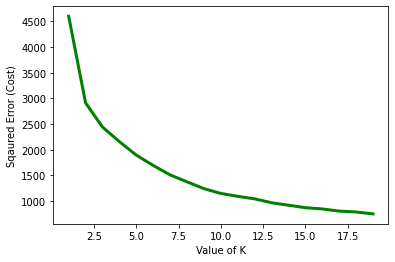

In [24]:
cost =[]
for i in range(1, 20):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X_train)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 20), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot